<a href="https://colab.research.google.com/github/sejeong-park/SAI_project/blob/main/dacon_npy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from tqdm import tqdm
from glob import glob
import gc
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import math
import zipfile

In [3]:
root_path = '/content/drive/MyDrive/data/'

In [4]:
train_csv = pd.read_csv(root_path + 'train.csv')
test_csv = pd.read_csv(root_path + 'test.csv')

In [5]:
train_all_input_files = root_path + 'train_input_img/'+train_csv['input_img']
train_all_label_files = root_path + 'train_label_img/'+train_csv['label_img']

In [6]:
len(train_all_input_files),len(train_all_label_files)

(622, 622)

In [7]:
from PIL import Image

x_img=np.array(Image.open(train_all_input_files[0]))
y_img=np.array(Image.open(train_all_label_files[0]))

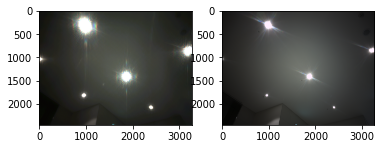

In [8]:
plt.subplot(1,2,1)
plt.imshow(x_img)
plt.subplot(1,2,2)
plt.imshow(y_img)
plt.show()

In [9]:
train_input_files = train_all_input_files[60:].to_numpy()
train_label_files = train_all_label_files[60:].to_numpy()

val_input_files = train_all_input_files[:60].to_numpy()
val_label_files = train_all_label_files[:60].to_numpy()

In [10]:
train_all_input_files[0], train_all_label_files[0]

('/content/drive/MyDrive/data/train_input_img/train_input_10000.png',
 '/content/drive/MyDrive/data/train_label_img/train_label_10000.png')

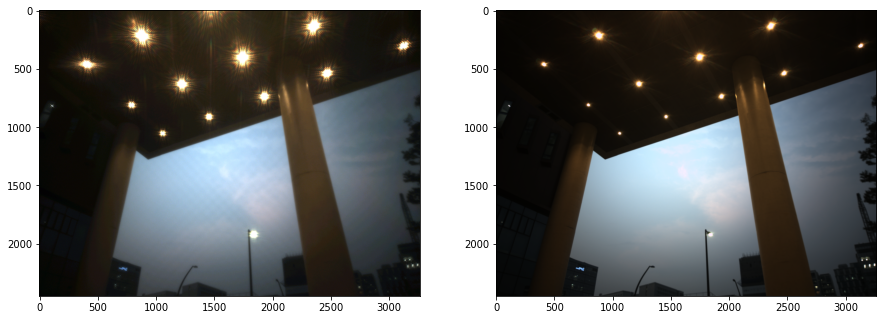

/content/drive/MyDrive/data/train_input_img/train_input_10060.png /content/drive/MyDrive/data/train_label_img/train_label_10060.png 



In [11]:
for input_path, label_path in zip(train_input_files, train_label_files):
    inp_img = cv2.imread(input_path)
    targ_img = cv2.imread(label_path)
    plt.figure(figsize=(15,10))
    inp_img = cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB)
    targ_img = cv2.cvtColor(targ_img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,1)
    plt.imshow(inp_img)
    plt.subplot(1,2,2)
    plt.imshow(targ_img)
    plt.show()
    print(input_path, label_path, '\n')
    break

In [12]:
BATCH_SIZE = 8
img_size = 256
#weights = None
weights = 'imagenet'
learning_rate = 1e-5
EPOCHS = 5
dropout_rate = 0.1

In [13]:
import pandas as pd
import numpy as np
import os
import cv2
from tqdm.auto import tqdm
import concurrent.futures
import functools

In [14]:

SAVE_TRAIN_INPUT_PATH = './data/train_input_img_'
SAVE_TRAIN_LABEL_PATH = './data/train_label_img_'

SAVE_VAL_INPUT_PATH='./data/val_input_img_'
SAVE_VAL_LABEL_PATH='./data/val_label_img_'

IMG_SIZE = 256
STRIDE = 128

In [15]:
os.makedirs(f'{SAVE_TRAIN_INPUT_PATH}{IMG_SIZE}', exist_ok=True)
os.makedirs(f'{SAVE_TRAIN_LABEL_PATH}{IMG_SIZE}', exist_ok=True)
os.makedirs(f'{SAVE_VAL_INPUT_PATH}{IMG_SIZE}', exist_ok=True)
os.makedirs(f'{SAVE_VAL_LABEL_PATH}{IMG_SIZE}', exist_ok=True)

In [16]:

def cut_img(save_path, img_path):    
    img = cv2.imread(img_path)
    img_name = os.path.basename(img_path)
    num = 0
    for top in range(0, img.shape[0], STRIDE):
        for left in range(0, img.shape[1], STRIDE):
            piece = np.zeros([IMG_SIZE, IMG_SIZE, 3], np.uint8)
            temp = img[top:top+IMG_SIZE, left:left+IMG_SIZE, :]
            piece[:temp.shape[0], :temp.shape[1], :] = temp
            #cv2.imwrite(f'{save_path}{IMG_SIZE}/{num}_{img_name}', piece)   #png         
            np.save(f'{save_path}{img_size}/{num}.npy', piece)                
            num+=1
    return

In [17]:

with concurrent.futures.ProcessPoolExecutor() as executor: # windows local 환경시 max_workers=os.cpu_count()//2
    list(tqdm(
        executor.map(functools.partial(cut_img, SAVE_TRAIN_INPUT_PATH), train_input_files),             
        desc='train input image cut',
        total=len(train_input_files)
    ))
    list(tqdm(
        executor.map(functools.partial(cut_img, SAVE_TRAIN_LABEL_PATH), train_label_files),             
        desc='train label image cut',
        total=len(train_label_files)
    ))
    list(tqdm(
        executor.map(functools.partial(cut_img, SAVE_VAL_INPUT_PATH), val_input_files),             
        desc='val input image cut',
        total=len(val_input_files)
    ))
    list(tqdm(
        executor.map(functools.partial(cut_img, SAVE_VAL_LABEL_PATH), val_label_files),             
        desc='val label image cut',
        total=len(val_label_files)
    ))

세정아 그 다음에 밑에 npy로 넘어가보자

빠른 이미지를 baseline코드대로 npy로 저장

In [18]:
img_size=256
train_inp_files = glob(f'./data/train_input_img_{img_size}/*.npy')
train_targ_files = glob(f'./data/train_label_img_{img_size}/*.npy')

val_inp_files = glob(f'./data/val_input_img_{img_size}/*.npy')
val_targ_files = glob(f'./data/val_label_img_{img_size}/*.npy')

In [19]:
train_inp_files

['./data/train_input_img_256/133.npy',
 './data/train_input_img_256/138.npy',
 './data/train_input_img_256/132.npy',
 './data/train_input_img_256/295.npy',
 './data/train_input_img_256/415.npy',
 './data/train_input_img_256/1.npy',
 './data/train_input_img_256/360.npy',
 './data/train_input_img_256/255.npy',
 './data/train_input_img_256/340.npy',
 './data/train_input_img_256/218.npy',
 './data/train_input_img_256/25.npy',
 './data/train_input_img_256/388.npy',
 './data/train_input_img_256/290.npy',
 './data/train_input_img_256/421.npy',
 './data/train_input_img_256/145.npy',
 './data/train_input_img_256/224.npy',
 './data/train_input_img_256/458.npy',
 './data/train_input_img_256/450.npy',
 './data/train_input_img_256/301.npy',
 './data/train_input_img_256/263.npy',
 './data/train_input_img_256/47.npy',
 './data/train_input_img_256/433.npy',
 './data/train_input_img_256/467.npy',
 './data/train_input_img_256/174.npy',
 './data/train_input_img_256/90.npy',
 './data/train_input_img_256/1

In [20]:
train_inp_files, train_targ_files = shuffle(train_inp_files, train_targ_files, random_state=42)

In [21]:
len(train_inp_files), len(val_inp_files), len(train_targ_files), len(val_targ_files)

(520, 520, 520, 520)

In [22]:
val_inp_files

['./data/val_input_img_256/133.npy',
 './data/val_input_img_256/138.npy',
 './data/val_input_img_256/132.npy',
 './data/val_input_img_256/295.npy',
 './data/val_input_img_256/415.npy',
 './data/val_input_img_256/1.npy',
 './data/val_input_img_256/360.npy',
 './data/val_input_img_256/255.npy',
 './data/val_input_img_256/340.npy',
 './data/val_input_img_256/218.npy',
 './data/val_input_img_256/25.npy',
 './data/val_input_img_256/388.npy',
 './data/val_input_img_256/290.npy',
 './data/val_input_img_256/421.npy',
 './data/val_input_img_256/145.npy',
 './data/val_input_img_256/224.npy',
 './data/val_input_img_256/458.npy',
 './data/val_input_img_256/450.npy',
 './data/val_input_img_256/301.npy',
 './data/val_input_img_256/263.npy',
 './data/val_input_img_256/47.npy',
 './data/val_input_img_256/433.npy',
 './data/val_input_img_256/467.npy',
 './data/val_input_img_256/174.npy',
 './data/val_input_img_256/90.npy',
 './data/val_input_img_256/13.npy',
 './data/val_input_img_256/52.npy',
 './data

여기까지는 성공 baseline에서는 npy 형태로 되는데, npy로 빠른 이미지 자르기 하면 (0,0,0,0) 배열이 저장되어서 상민님이 한대로 png를 사용했다. 하지만 png를 사용할 경우 다음이 안된다...


In [23]:
def train_map_func(inp_path, targ_path):
    inp = np.load(inp_path)
    inp = inp.astype(np.float32)/255
    targ = np.load(targ_path)
    targ = targ.astype(np.float32)/255
    inp, targ = augmentation(inp, targ)
    
    return inp, targ

def val_map_func(inp_path, targ_path):
    inp = np.load(inp_path)
    inp = inp.astype(np.float32)/255
    targ = np.load(targ_path)
    targ = targ.astype(np.float32)/255
    return inp, targ

def augmentation(inp, targ):
    inp, targ = random_rot(inp, targ)
    inp, targ = random_flip(inp, targ)
    
    return inp, targ

def random_rot(inp, targ):
    k = np.random.randint(4)
    inp = np.rot90(inp, k)
    targ = np.rot90(targ, k)
    
    return inp, targ

def random_flip(inp, targ):
    f = np.random.randint(2)
    if f == 0:
        inp = np.fliplr(inp)
        targ = np.fliplr(targ)
        
    return inp, targ

In [24]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_inp_files, train_targ_files))
train_dataset = train_dataset.map(lambda item1, item2: tf.numpy_function(train_map_func, [item1, item2], [tf.float32, tf.float32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_inp_files, val_targ_files))
val_dataset = val_dataset.map(lambda item1, item2: tf.numpy_function(val_map_func, [item1, item2], [tf.float32, tf.float32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [25]:
next(iter(train_dataset))[0].shape, next(iter(train_dataset))[1].shape, next(iter(val_dataset))[0].shape, next(iter(val_dataset))[1].shape

(TensorShape([8, 256, 256, 3]),
 TensorShape([8, 256, 256, 3]),
 TensorShape([8, 256, 256, 3]),
 TensorShape([8, 256, 256, 3]))

In [26]:
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = tf.keras.layers.Conv2D(filters, size, strides=strides, padding=padding)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    if activation == True:
        x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(blockInput, num_filters=16):
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(blockInput)
    x = tf.keras.layers.BatchNormalization()(x)
    blockInput = tf.keras.layers.BatchNormalization()(blockInput)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = tf.keras.layers.Add()([x, blockInput])
    return x

In [27]:
def ResUNet101V2(input_shape=(None, None, 3), dropout_rate=0.1, start_neurons = 16):
    backbone = tf.keras.applications.ResNet101V2(weights=weights, include_top=False, input_shape=input_shape)
    input_layer = backbone.input
    
    conv4 = backbone.layers[122].output
    conv4 = tf.keras.layers.LeakyReLU(alpha=0.1)(conv4)
    pool4 = tf.keras.layers.MaxPooling2D((2, 2))(conv4)
    pool4 = tf.keras.layers.Dropout(dropout_rate)(pool4)
    
    convm = tf.keras.layers.Conv2D(start_neurons * 32, (3, 3), activation=None, padding="same")(pool4)
    convm = residual_block(convm,start_neurons * 32)
    convm = residual_block(convm,start_neurons * 32)
    convm = tf.keras.layers.LeakyReLU(alpha=0.1)(convm)
    
    deconv4 = tf.keras.layers.Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = tf.keras.layers.concatenate([deconv4, conv4])
    uconv4 = tf.keras.layers.Dropout(dropout_rate)(uconv4)
    
    uconv4 = tf.keras.layers.Conv2D(start_neurons * 16, (3, 3), activation=None, padding="same")(uconv4)
    uconv4 = residual_block(uconv4,start_neurons * 16)
    uconv4 = residual_block(uconv4,start_neurons * 16)
    uconv4 = tf.keras.layers.LeakyReLU(alpha=0.1)(uconv4)
    
    deconv3 = tf.keras.layers.Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(uconv4)
    conv3 = backbone.layers[76].output
    uconv3 = tf.keras.layers.concatenate([deconv3, conv3])    
    uconv3 = tf.keras.layers.Dropout(dropout_rate)(uconv3)
    
    uconv3 = tf.keras.layers.Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = residual_block(uconv3,start_neurons * 8)
    uconv3 = residual_block(uconv3,start_neurons * 8)
    uconv3 = tf.keras.layers.LeakyReLU(alpha=0.1)(uconv3)

    deconv2 = tf.keras.layers.Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv3)
    conv2 = backbone.layers[30].output
    uconv2 = tf.keras.layers.concatenate([deconv2, conv2])
        
    uconv2 = tf.keras.layers.Dropout(0.1)(uconv2)
    uconv2 = tf.keras.layers.Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = residual_block(uconv2,start_neurons * 4)
    uconv2 = residual_block(uconv2,start_neurons * 4)
    uconv2 = tf.keras.layers.LeakyReLU(alpha=0.1)(uconv2)
    
    deconv1 = tf.keras.layers.Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv2)
    conv1 = backbone.layers[2].output
    uconv1 = tf.keras.layers.concatenate([deconv1, conv1])
    
    uconv1 = tf.keras.layers.Dropout(0.1)(uconv1)
    uconv1 = tf.keras.layers.Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = residual_block(uconv1,start_neurons * 2)
    uconv1 = residual_block(uconv1,start_neurons * 2)
    uconv1 = tf.keras.layers.LeakyReLU(alpha=0.1)(uconv1)
    
    uconv0 = tf.keras.layers.Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv1)   
    uconv0 = tf.keras.layers.Dropout(0.1)(uconv0)
    uconv0 = tf.keras.layers.Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv0)
    uconv0 = residual_block(uconv0,start_neurons * 1)
    uconv0 = residual_block(uconv0,start_neurons * 1)
    uconv0 = tf.keras.layers.LeakyReLU(alpha=0.1)(uconv0)
    
    uconv0 = tf.keras.layers.Dropout(dropout_rate/2)(uconv0)
    output_layer = tf.keras.layers.Conv2D(3, (1,1), padding="same", activation="sigmoid")(uconv0)    
    
    model = tf.keras.models.Model(input_layer, output_layer)

    return model

In [28]:

optimizer = tf.keras.optimizers.Adam(learning_rate)
model = ResUNet101V2(input_shape=(img_size, img_size, 3),dropout_rate=dropout_rate)
model.compile(loss='mae', optimizer=optimizer)

171319296/171317808 [==============================] - 1s 0us/step


In [29]:
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath = 'models/baseline_model.h5',
        monitor='val_loss',
        save_best_only=True
    )
]

In [30]:
hist = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset, callbacks=callbacks_list)

Epoch 1/5
65/65 [==============================] - 63s 329ms/step - loss: 0.3480 - val_loss: 0.3456


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
65/65 [==============================] - 19s 293ms/step - loss: 0.3004 - val_loss: 0.3257
Epoch 3/5
65/65 [==============================] - 19s 296ms/step - loss: 0.2738 - val_loss: 0.3027
Epoch 4/5
65/65 [==============================] - 19s 300ms/step - loss: 0.2571 - val_loss: 0.2905
Epoch 5/5
65/65 [==============================] - 20s 303ms/step - loss: 0.2456 - val_loss: 0.2809


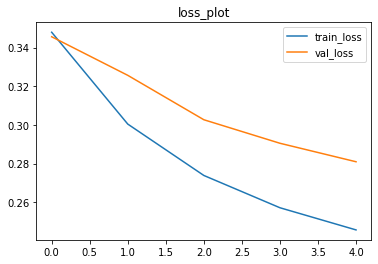

In [31]:
plt.plot(hist.history["loss"], label='train_loss')
plt.plot(hist.history["val_loss"], label='val_loss')
plt.title('loss_plot')
plt.legend()
plt.show()

In [32]:
model = tf.keras.models.load_model('models/baseline_model.h5')

In [33]:
def predict(img_paths, stride=32, batch_size=128):
    results = []
    for img_path in img_paths:
        img = cv2.imread(img_path)
        img = img.astype(np.float32)/255
        crop = []
        position = []
        batch_count = 0

        result_img = np.zeros_like(img)
        voting_mask = np.zeros_like(img)

        for top in tqdm(range(0, img.shape[0], stride)):
            for left in range(0, img.shape[1], stride):
                piece = np.zeros([img_size, img_size, 3], np.float32)
                temp = img[top:top+img_size, left:left+img_size, :]
                piece[:temp.shape[0], :temp.shape[1], :] = temp
                crop.append(piece)
                position.append([top, left])
                batch_count += 1
                if batch_count == batch_size:
                    crop = np.array(crop)
                    pred = model(crop)*255
                    crop = []
                    batch_count = 0
                    for num, (t, l) in enumerate(position):
                        piece = pred[num]
                        h, w, c = result_img[t:t+img_size, l:l+img_size, :].shape
                        result_img[t:t+img_size, l:l+img_size, :] += piece[:h, :w]
                        voting_mask[t:t+img_size, l:l+img_size, :] += 1
                    position = []
        
        result_img = result_img/voting_mask
        result_img = result_img.astype(np.uint8)
        results.append(result_img)
        
    return results

In [34]:
def rmse_score(true, pred):
    score = math.sqrt(np.mean((true-pred)**2))
    return score

def psnr_score(true, pred, pixel_max):
    score = 20*np.log10(pixel_max/rmse_score(true, pred))
    return score

In [41]:
val_input_files

array(['/content/drive/MyDrive/data/train_input_img/train_input_10000.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10001.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10002.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10003.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10004.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10005.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10006.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10007.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10008.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10009.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10010.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10011.png',
       '/content/drive/MyDrive/data/train_input_img/train_input_10012.png',
       '/con

In [35]:
result = predict(val_input_files[:5], 32)

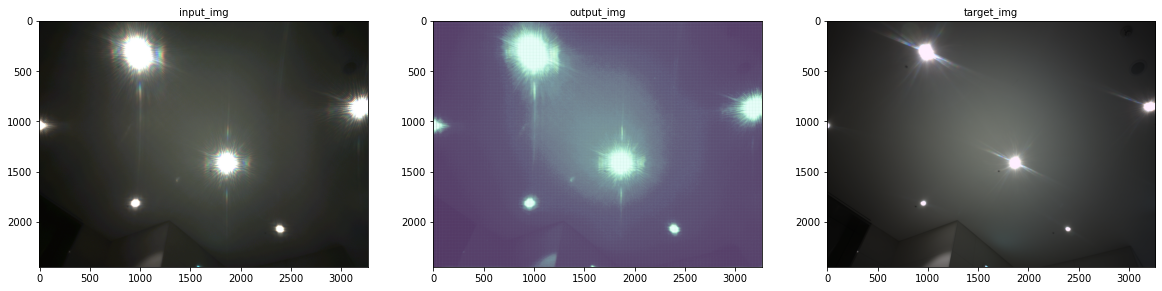

input PSNR : 21.319842770194096
output PSNR : 13.384238978964662 



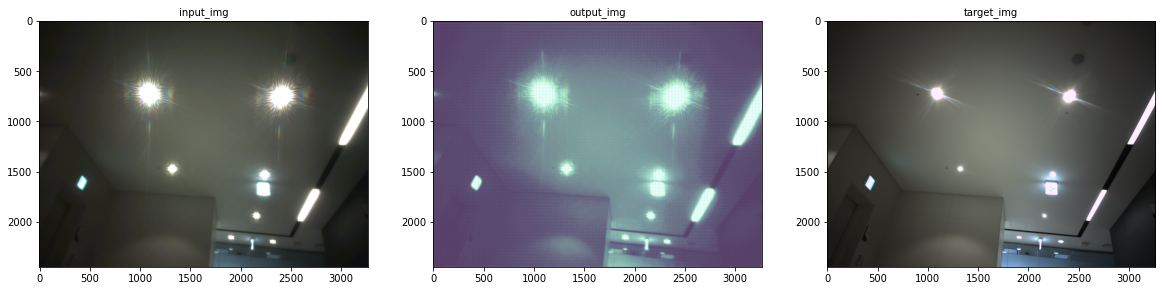

input PSNR : 20.699688771000467
output PSNR : 14.061186030410122 



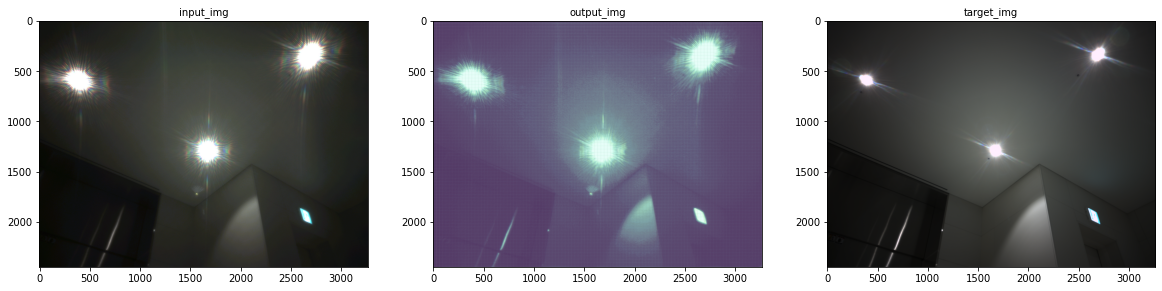

input PSNR : 21.733467472035976
output PSNR : 12.968467429763868 



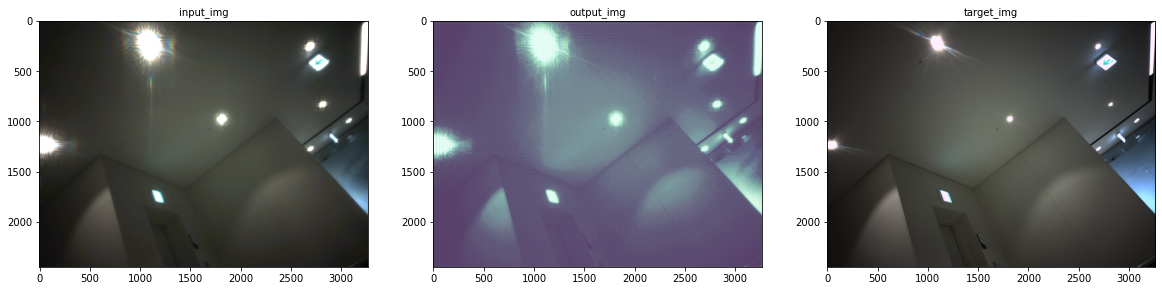

input PSNR : 20.92765411186867
output PSNR : 13.604177259567505 



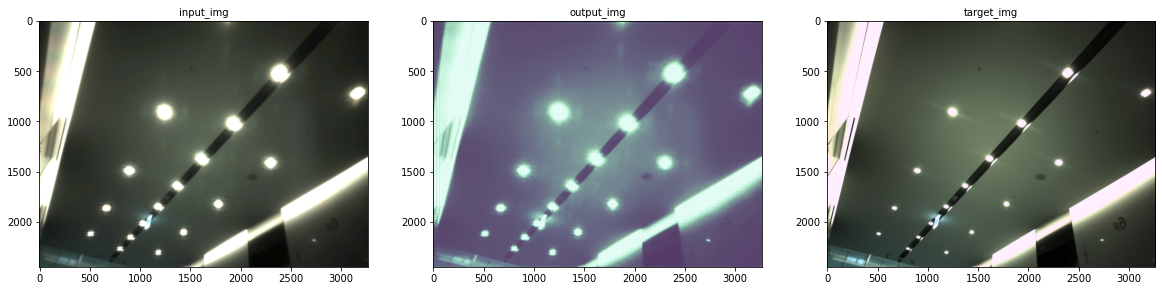

input PSNR : 21.007323217924263
output PSNR : 13.816660283294752 



In [36]:
for i, (input_path, label_path) in enumerate(zip(val_input_files[:5], val_label_files[:5])):
    input_img = cv2.imread(input_path)
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    targ_img = cv2.imread(label_path)
    targ_img = cv2.cvtColor(targ_img, cv2.COLOR_BGR2RGB)
    pred_img = result[i]
    pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(20,10))
    plt.subplot(1,3,1)
    plt.imshow(input_img)
    plt.title('input_img', fontsize=10)
    plt.subplot(1,3,2)
    plt.imshow(pred_img)
    plt.title('output_img', fontsize=10)
    plt.subplot(1,3,3)
    plt.imshow(targ_img)
    plt.title('target_img', fontsize=10)
    plt.show()
    print('input PSNR :', psnr_score(input_img.astype(float), targ_img.astype(float), 255))
    print('output PSNR :', psnr_score(result[i].astype(float), targ_img.astype(float), 255), '\n')

In [47]:
test_input_files = './data/test_input_img/'+test_csv['input_img']

In [48]:
test_input_files

0     ./data/test_input_img/test_input_20000.png
1     ./data/test_input_img/test_input_20001.png
2     ./data/test_input_img/test_input_20002.png
3     ./data/test_input_img/test_input_20003.png
4     ./data/test_input_img/test_input_20004.png
5     ./data/test_input_img/test_input_20005.png
6     ./data/test_input_img/test_input_20006.png
7     ./data/test_input_img/test_input_20007.png
8     ./data/test_input_img/test_input_20008.png
9     ./data/test_input_img/test_input_20009.png
10    ./data/test_input_img/test_input_20010.png
11    ./data/test_input_img/test_input_20011.png
12    ./data/test_input_img/test_input_20012.png
13    ./data/test_input_img/test_input_20013.png
14    ./data/test_input_img/test_input_20014.png
15    ./data/test_input_img/test_input_20015.png
16    ./data/test_input_img/test_input_20016.png
17    ./data/test_input_img/test_input_20017.png
18    ./data/test_input_img/test_input_20018.png
19    ./data/test_input_img/test_input_20019.png
Name: input_img, dty

In [44]:
def predict(img_paths, stride=32, batch_size=128):
    results = []
    for img_path in img_paths:
        img = cv2.imread(img_path)
        img = img.astype(np.float32)/255
        crop = []
        position = []
        batch_count = 0

        result_img = np.zeros_like(img)
        voting_mask = np.zeros_like(img)

        for top in tqdm(range(0, img.shape[0], stride)):
            for left in range(0, img.shape[1], stride):
                piece = np.zeros([img_size, img_size, 3], np.float32)
                temp = img[top:top+img_size, left:left+img_size, :]
                piece[:temp.shape[0], :temp.shape[1], :] = temp
                crop.append(piece)
                position.append([top, left])
                batch_count += 1
                if batch_count == batch_size:
                    crop = np.array(crop)
                    pred = model(crop)*255
                    crop = []
                    batch_count = 0
                    for num, (t, l) in enumerate(position):
                        piece = pred[num]
                        h, w, c = result_img[t:t+img_size, l:l+img_size, :].shape
                        result_img[t:t+img_size, l:l+img_size, :] += piece[:h, :w]
                        voting_mask[t:t+img_size, l:l+img_size, :] += 1
                    position = []
        
        result_img = result_img/voting_mask
        result_img = result_img.astype(np.uint8)
        results.append(result_img)
        
    return results

In [45]:
test_result = predict(test_input_files[:5], 32)

AttributeError: ignored

In [46]:
for i, input_path in enumerate(test_input_files):
    input_img = cv2.imread(input_path)
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    pred_img = test_result[i]
    pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(input_img)
    plt.title('input_img', fontsize=10)
    plt.subplot(1,2,2)
    plt.imshow(pred_img)
    plt.title('output_img', fontsize=10)
    plt.show()

error: ignored

In [ ]:
def make_submission(result):
    os.makedirs('submission', exist_ok=True)
    os.chdir("./submission/")
    sub_imgs = []
    for i, img in enumerate(result):
        path = f'test_{20000+i}.png'
        cv2.imwrite(path, img)
        sub_imgs.append(path)
    submission = zipfile.ZipFile("submission.zip", 'w')
    for path in sub_imgs:
        submission.write(path)
    submission.close()

In [ ]:
make_submission(test_result)